In [1]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 6. Write a script to download TESS lightcurves for a source with a given set of RA/Dec coordinates. You can use “lightkurve” which is a tool used to download TESS and Kepler data. 

In [63]:
"""
Searches and downloads light curve data based on coordinates from NASA's TESS using the lightkurve package.
RA should be between 0 and 360, DEC should be between -90 and 90
Returns the Collection of LightCurve objects downloaded
"""
def download_TESS_lightcurves(ra, dec, cone_radius):
    sign = ' -' if dec < 0 else ' +'
    coord_string = str(ra % 360) + sign + str(dec)
    search = lk.search_lightcurve(coord_string, radius=cone_radius, mission='TESS')
    print(search)
    lightcurve_collection = search.download_all(download_dir="data")
    for i in range(0, len(lightcurve_collection), 2):    # print every second lightcurve as samples
        lightcurve_collection[i].plot()
    return lightcurve_collection
    

SearchResult containing 17 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 14 2019      SPOC     120   377780790      0.0
  1 TESS Sector 14 2019 TESS-SPOC    1800   377780790      0.0
  2 TESS Sector 14 2019       QLP    1800   377780790      0.0
  3 TESS Sector 15 2019 TESS-SPOC    1800   377780790      0.0
  4 TESS Sector 15 2019       QLP    1800   377780790      0.0
  5 TESS Sector 15 2019     CDIPS    1800   377780790      0.0
  6 TESS Sector 26 2020 TESS-SPOC    1800   377780790      0.0
  7 TESS Sector 26 2020       QLP    1800   377780790      0.0
  8 TESS Sector 26 2020     CDIPS    1800   377780790      0.0
  9 TESS Sector 40 2021      SPOC      20   377780790      0.0
 10 TESS Sector 40 2021      SPOC     120   377780790      0.0
 11 TESS Sector 40 2021 TESS-SPOC     600   377780790      0.0
 12 TESS Sec

TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]


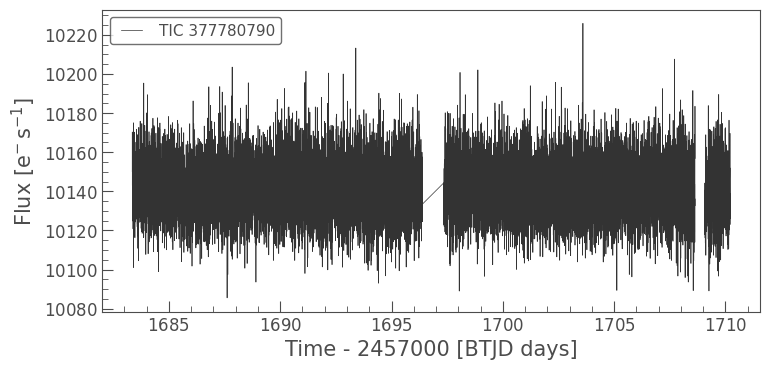

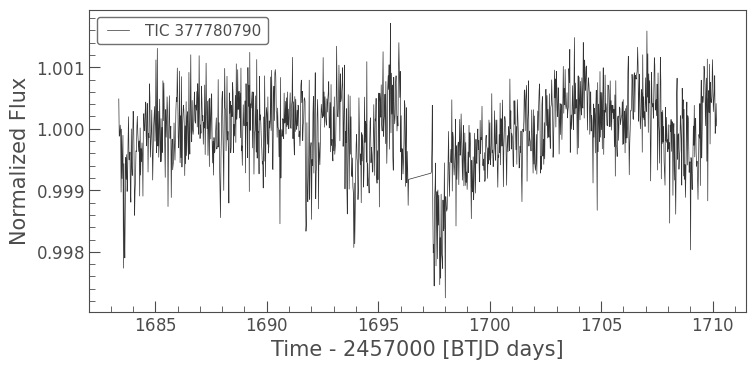

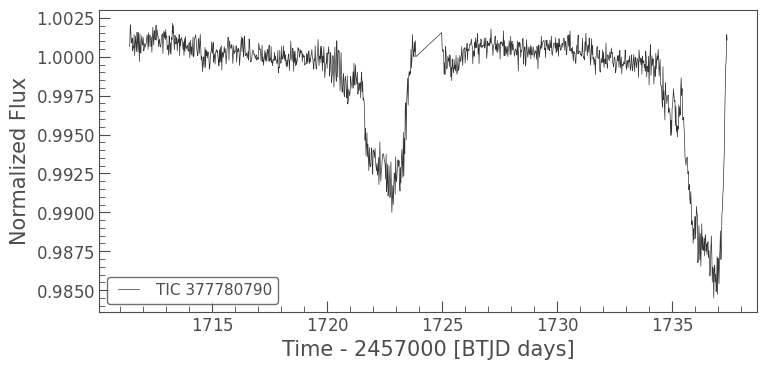

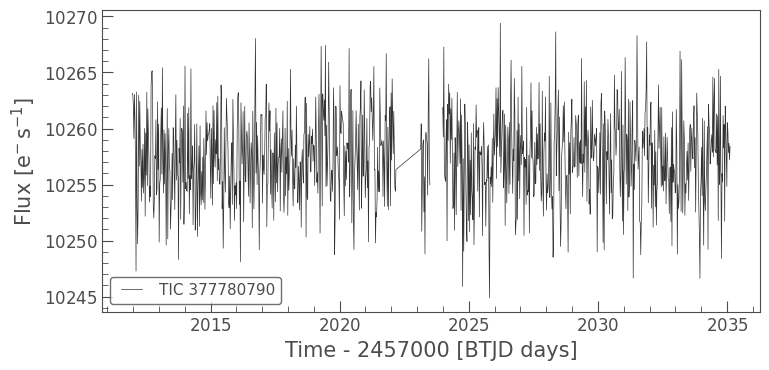

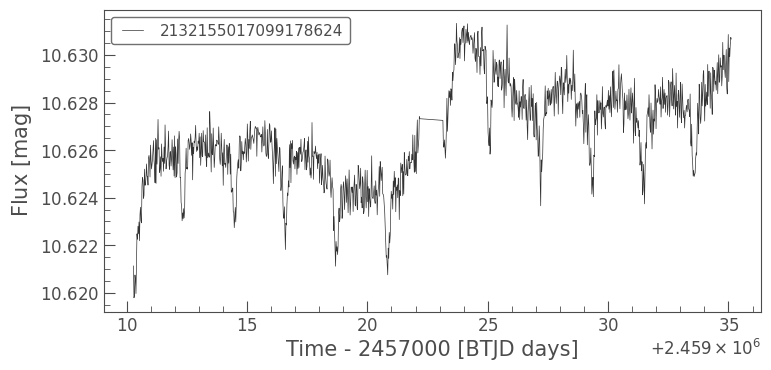

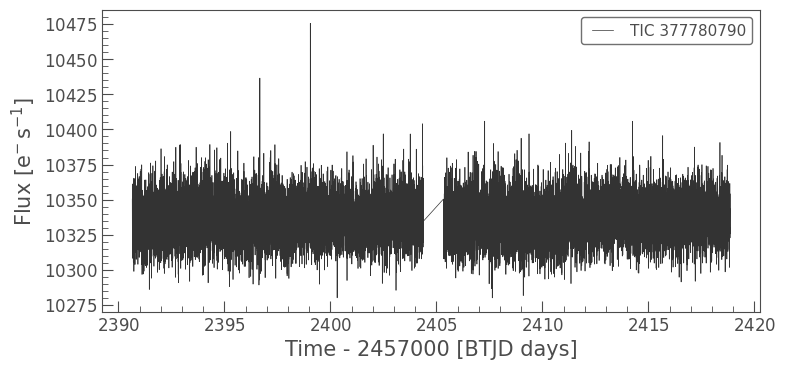

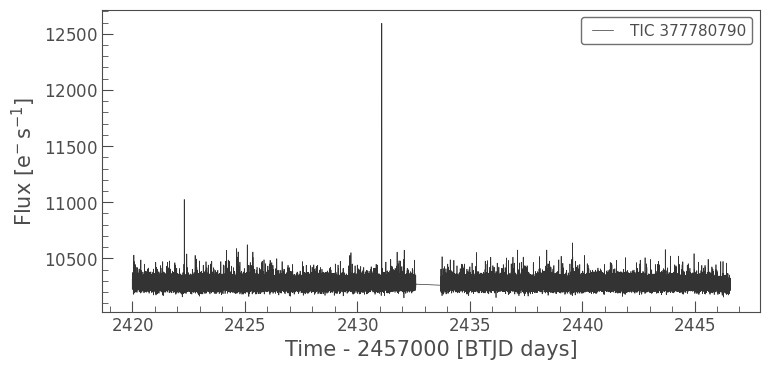

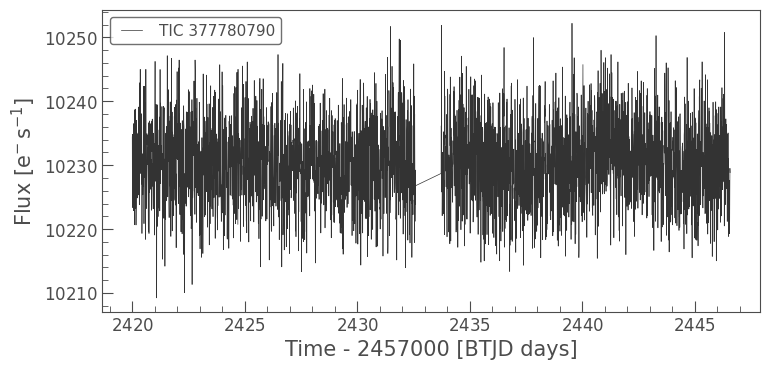

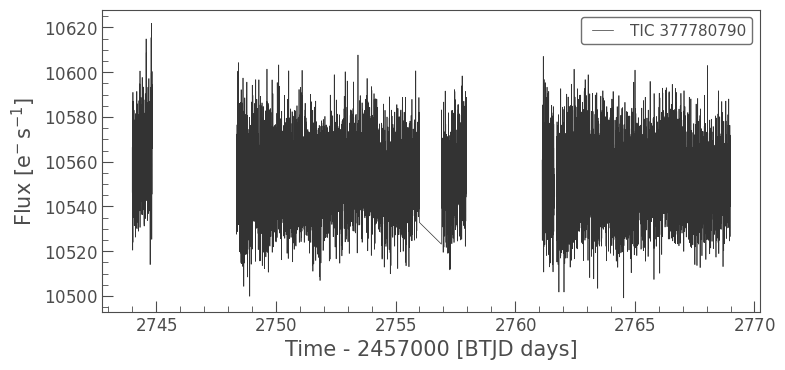

In [64]:
lightcurve_collection1 = download_TESS_lightcurves(285.67942179, 50.24130576, 0.0001)
# The warnings below are caused by items at index 5 and 8, which have table columns 
# that are unitless and can't be converted into numerical values.
# But they should be harmless and can still be plotted.

In [16]:
lightcurve_collection1[0].copy().flux

<MaskedQuantity [10150.107, 10170.345, 10143.026, ..., 10123.034,
                 10144.22 , 10138.657] electron / s>

### 7. Write a class for a simple simulator: It should get a lightcurve (times vs. counts/flux/magnitudes, whichever you like) and outputs a similar data set, only with a “bump” added to one of the measurements. The bump can be 10% of the mean flux of that source, but you should leave the value of that fraction as an attribute of the simulator object. The bump should be added to a randomly chosen point on the lightcurve, and should only affect that one measurement.


In [47]:
import random

class BumpedLightCurve:
    
    def __init__(self, lightcurve, bump_fraction=0.1):
        num_rows = len(lightcurve.flux)
        rand_index = random.randint(0, num_rows - 1)
        mean_flux = np.mean(lightcurve.flux)
        
        new_data = lightcurve.copy()    # probably better to make copy of data table for new object
        new_data.flux[rand_index] += bump_fraction * mean_flux

        self.orig = lightcurve
        self.bump = lk.LightCurve(new_data)
        
    def plot_compare(self):
        fig = plt.figure(figsize=(15, 5))
        ax_orig = plt.subplot(1, 2, 1, title="Original Lightcurve")
        ax_bump = plt.subplot(1, 2, 2, title="Bumped Lightcurve")

        self.orig.plot(ax=ax_orig)
        self.bump.plot(ax=ax_bump)

        fig.tight_layout()
        plt.show()
        plt.close(fig)
        

### 8. Plot the lightcurve with and without the bump in one plot. Remember to use axes labels, legend, etc.

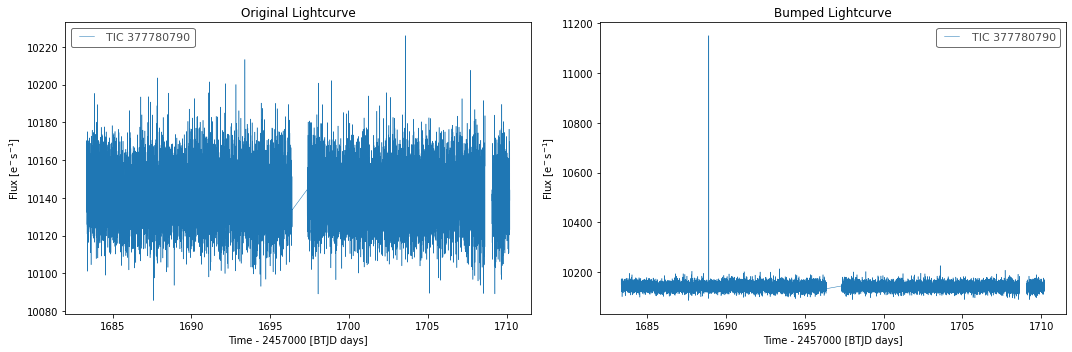

In [51]:
# test with first lightcurve
blc = BumpedLightCurve(lightcurve_collection1[0], bump_fraction=0.1)
blc.plot_compare()

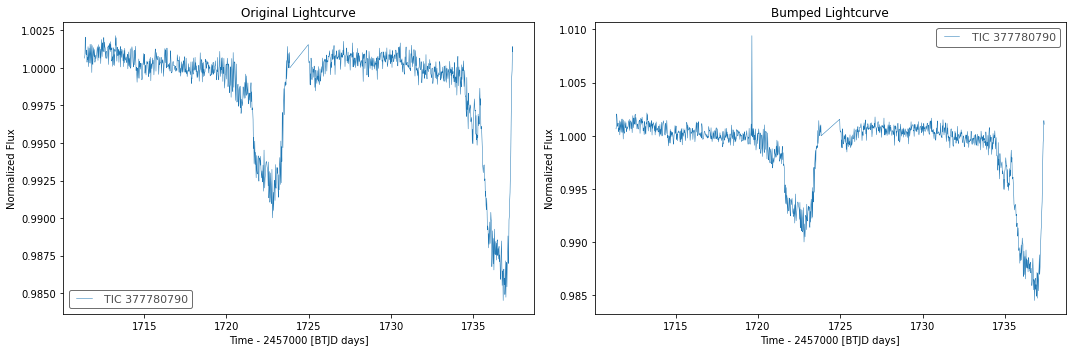

In [54]:
# test with 4th lightcurve
blc = BumpedLightCurve(lightcurve_collection1[4], bump_fraction=0.01)
blc.plot_compare()

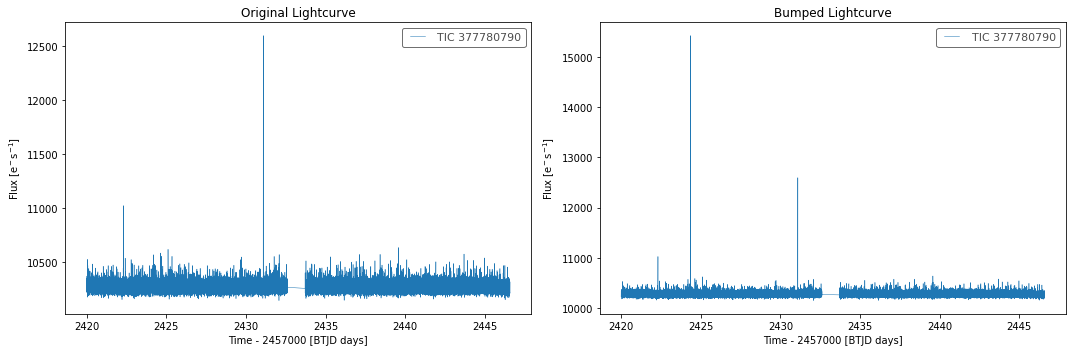

In [62]:
# test with 12th lightcurve
blc = BumpedLightCurve(lightcurve_collection1[12], bump_fraction=0.5)
blc.plot_compare()